In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import math

In [9]:
def filter_and_plot_weekly_averages(csv_name, num_columns):
    
    df = pd.read_csv(csv_name)
    df_filtered = df[~df['Record_Year'].isin([2021, 2022])]
    df_filtered = df_filtered[~((df_filtered['Record_Year'] == 2023) & (df_filtered['Record_Week'] > 45))]
    
    column_legend_list = [
        ('2m_Temperature', '2MT'),
        ('2m_Dewpoint_Temperature', '2MDT'),
        ('Total_Precipitation', 'T.P'),
        ('Case_Count', 'C.C')
    ]
    
    # Check if the number of columns to plot is valid
    if num_columns > len(column_legend_list):
        raise ValueError("Number of columns to plot exceeds the provided column legend list length.")
    
    # Calculate weekly averages for the filtered DataFrame
    weekly_averages = df_filtered.groupby('Record_Week').mean()

    # Plot each specified column with the desired legend names
    for i in range(num_columns):
        column_name, legend_label = column_legend_list[i]
        plt.plot(weekly_averages.index, weekly_averages[column_name], label=legend_label)
    
    print(df['District'].unique())

    # Customize the plot with titles and labels
    plt.title('Weekly Average')
    plt.xlabel('Week Number')
    plt.ylabel('Average Value')
    plt.legend()  # This will use the labels provided in the plot calls
    plt.show()
    
    return df_filtered

['KALABURAGI' 'HASSAN' 'BENGALURU URBAN' 'UTTARA KANNADA' 'BELAGAVI'
 'BIDAR' 'BAGALKOTE' 'CHIKKABALLAPURA' 'BALLARI' 'KOLAR'
 'DAKSHINA KANNADA' 'VIJAYAPURA' 'SHIVAMOGGA' 'HAVERI' 'CHITRADURGA'
 'CHAMARAJANAGARA' 'DAVANGERE' 'RAMANAGARA' 'CHIKKAMAGALURU' 'TUMAKURU'
 'RAICHUR' 'BENGALURU RURAL' 'DHARWAD' 'GADAG' 'KOPPAL' 'VIJAYANAGAR'
 'UDUPI' 'MYSURU' 'MANDYA' 'KODAGU' 'YADGIR']


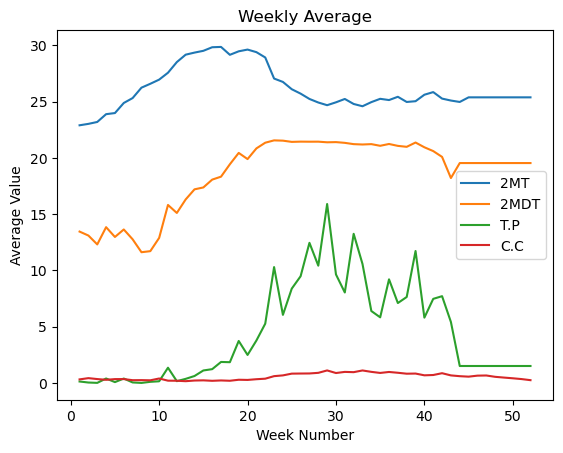

,District,District_LGD_Code,Subdistrict,Subdistrict_LGD_Code,Record_Year,Record_Week,2m_Temperature,Record_Date_x,2m_Dewpoint_Temperature,Total_Precipitation,Population,Geographical_Area,Population_Density,Case_Count,Moving_Avg_4w,Moving_Std_4w
0,KALABURAGI,538,AFZALPUR,5581,2017,1,23.152054,2017-01-02,10.080809,0.000000,220339.0,1307.0,168.0,0.0,0.0,NaN
1,KALABURAGI,538,AFZALPUR,5581,2017,2,23.773009,2017-01-09,12.166066,0.005722,220339.0,1307.0,168.0,0.0,0.0,0.0
2,KALABURAGI,538,AFZALPUR,5581,2017,3,24.308976,2017-01-16,11.696122,0.000000,220339.0,1307.0,168.0,0.0,0.0,0.0
3,KALABURAGI,538,AFZALPUR,5581,2017,4,25.781562,2017-01-23,13.692137,0.012125,220339.0,1307.0,168.0,0.0,0.0,0.0
4,KALABURAGI,538,AFZALPUR,5581,2017,5,26.101692,2017-01-30,11.635217,0.000000,220339.0,1307.0,168.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70240,UTTARA KANNADA,550,YELLAPUR,5481,2023,41,25.935788,2023-10-09,22.509168,1.371929,78662.0,1313.0,60.0,0.0,0.0,0.0
70241,UTTARA KANNADA,550,YELLAPUR,5481,2023,42,26.230291,2023-10-16,21.837563,2.372265,78662.0,1313.0,60.0,0.0,0.0,0.0
70242,UTTARA KANNADA,550,YELLAPUR,5481,2023,43,26.343642,2023-10-23,18.657676,0.187056,78662.0,1313.0,60.0,0.0,0.0,0.0
70243,UTTARA KANNADA,550,YELLAPUR,5481,2023,44,25.159018,2023-10-30,20.992931,2.210276,78662.0,1313.0,60.0,0.0,0.0,0.0


In [80]:
csv_name = "reddi.csv"
df_filtered = filter_and_plot_weekly_averages(csv_name, 4)
df_filtered

In [121]:
def plot_variable(df,column_name):  
    weekly_averages = df.groupby('Record_Week').sum()
    columns_to_plot = [column_name] 
    weekly_averages[columns_to_plot].plot()



    plt.title('Weekly Average of Selected Columns')
    plt.xlabel('Week Number')
    plt.ylabel('sum')

    plt.legend()
    plt.show()

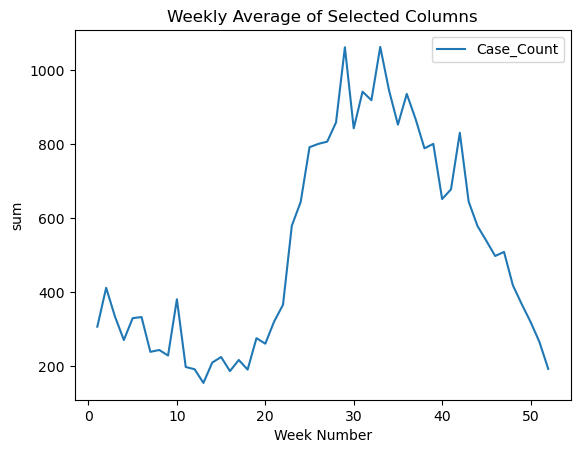

In [122]:
plot_variable(df_filtered,'Case_Count')

In [132]:
def dpl(df,num_columns):
    column_legend_list = [
        ('2m_Temperature', '2MT'),
        ('2m_Dewpoint_Temperature', '2MDT'),
        ('Total_Precipitation', 'T.P'),
        ('Case_Count', 'C.C')
    ]
    
    # Check if the number of columns to plot is valid
    if num_columns > len(column_legend_list):
        raise ValueError("Number of columns to plot exceeds the provided column legend list length.")
    
    # Calculate weekly averages for the filtered DataFrame
    weekly_averages = df.groupby('Record_Week').mean()

    # Plot each specified column with the desired legend names
    for i in range(num_columns):
        column_name, legend_label = column_legend_list[i]
        plt.plot(weekly_averages.index, weekly_averages[column_name], label=legend_label)
    
    print(df['District'].unique())

    # Customize the plot with titles and labels
    plt.title('Weekly Average')
    plt.xlabel('Week Number')
    plt.ylabel('Average Value')
    plt.legend()  # This will use the labels provided in the plot calls
    plt.show()

['MYSURU']


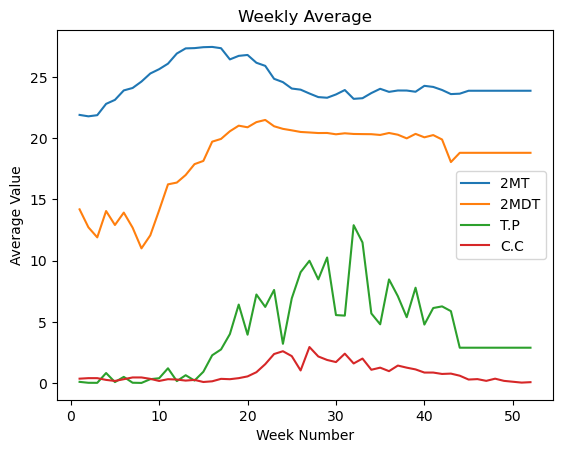

In [147]:
dpl(dd,4)

In [83]:
def district_df(df_main,district_name):   
    df_c = df_main.loc[df_main['District'] == district_name]
    df_c = df_c[["2m_Temperature","2m_Dewpoint_Temperature","Total_Precipitation","Case_Count"]]
    df_c = df_c.dropna()
    df_c = df_c.reset_index()
    df_c = df_c.drop("index",axis=1)
    return df_c

In [123]:
def d1(df_main,district_name):   
    df_c = df_main.loc[df_main['District'] == district_name]
    #df_c = df_c[["2m_Temperature","2m_Dewpoint_Temperature","Total_Precipitation","Case_Count"]]
    df_c = df_c.dropna()
    df_c = df_c.reset_index()
    df_c = df_c.drop("index",axis=1)
    return df_c

In [84]:
def select_district(df_main):
    # Print the unique districts
    unique_districts = df_main['District'].unique()
    print("Available districts:", unique_districts)
    
    # Ask the user to type the district they want
    district_name = input("Please type the district you want: ")
    
    # Check if the entered district is in the list of unique districts
    if district_name in unique_districts:
        return district_name
    else:
        print("The district you typed is not in the list. Please try again.")
        return None  # or you can loop until a valid district is entered

    

In [134]:
def s1(df_main):
    # Print the unique districts
    unique_districts = df_main['District'].unique()
    print("Available districts:", unique_districts)
    
    # Ask the user to type the district they want
    district_name = input("Please type the district you want: ")
    
    # Check if the entered district is in the list of unique districts
    if district_name in unique_districts:
        return district_name
    else:
        print("The district you typed is not in the list. Please try again.")
        return None  # or you can loop until a valid district is entered

In [75]:
def plot_weekly_averages(df, num_columns, column_legend_list):
    """
    Plots weekly averages of specified columns from a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame with a 'Record_Week' column.
    num_columns (int): The number of columns to plot.
    column_legend_list (list): A list of tuples where each tuple contains the column name and its legend label.
    """
    # Ensure that the number of columns to plot does not exceed the length of the column_legend_list
    if num_columns > len(column_legend_list):
        raise ValueError("Number of columns to plot exceeds the provided column legend list length.")
    
    # Calculate weekly averages
    weekly_averages = df.groupby('Record_Week').mean()

    # Plot each specified column with the desired legend names
    for i in range(num_columns):
        column_name, legend_label = column_legend_list[i]
        plt.plot(weekly_averages[column_name], label=legend_label)

    # Customize the plot with titles and labels
    plt.title('Weekly Average')
    plt.xlabel('Week Number')
    plt.ylabel('Average Value')
    plt.legend()  # This will use the labels provided in the plot calls
    # plt.grid(True)  # Optional: Uncomment to add a grid to the plot for better readability
    plt.show()

In [115]:
# Example usage:
df_main = df_filtered  # Your main dataframe
selected_district = select_district(df_main)
if selected_district:
    district_data = district_df(df_main, selected_district)
    # Now you can use district_data for further processing

Available districts: ['KALABURAGI' 'HASSAN' 'BENGALURU URBAN' 'UTTARA KANNADA' 'BELAGAVI'
 'BIDAR' 'BAGALKOTE' 'CHIKKABALLAPURA' 'BALLARI' 'KOLAR'
 'DAKSHINA KANNADA' 'VIJAYAPURA' 'SHIVAMOGGA' 'HAVERI' 'CHITRADURGA'
 'CHAMARAJANAGARA' 'DAVANGERE' 'RAMANAGARA' 'CHIKKAMAGALURU' 'TUMAKURU'
 'RAICHUR' 'BENGALURU RURAL' 'DHARWAD' 'GADAG' 'KOPPAL' 'VIJAYANAGAR'
 'UDUPI' 'MYSURU' 'MANDYA' 'KODAGU' 'YADGIR']
Please type the district you want: UDUPI


In [145]:
# Example usage:
df_main = df_filtered  # Your main dataframe
selected_district = s1(df_main)
if selected_district:
    dd = d1(df_main, selected_district)
    # Now you can use district_data for further processing

Available districts: ['KALABURAGI' 'HASSAN' 'BENGALURU URBAN' 'UTTARA KANNADA' 'BELAGAVI'
 'BIDAR' 'BAGALKOTE' 'CHIKKABALLAPURA' 'BALLARI' 'KOLAR'
 'DAKSHINA KANNADA' 'VIJAYAPURA' 'SHIVAMOGGA' 'HAVERI' 'CHITRADURGA'
 'CHAMARAJANAGARA' 'DAVANGERE' 'RAMANAGARA' 'CHIKKAMAGALURU' 'TUMAKURU'
 'RAICHUR' 'BENGALURU RURAL' 'DHARWAD' 'GADAG' 'KOPPAL' 'VIJAYANAGAR'
 'UDUPI' 'MYSURU' 'MANDYA' 'KODAGU' 'YADGIR']
Please type the district you want: MYSURU


In [146]:
dd

,District,District_LGD_Code,Subdistrict,Subdistrict_LGD_Code,Record_Year,Record_Week,2m_Temperature,Record_Date_x,2m_Dewpoint_Temperature,Total_Precipitation,Population,Geographical_Area,Population_Density,Case_Count,Moving_Avg_4w,Moving_Std_4w
0,MYSURU,545,HEGGADADEVANKOTE,5573,2017,2,22.290238,2017-01-09,14.471591,0.006403,179316.0,1116.0,171.0,0.0,0.00,0.000000
1,MYSURU,545,HEGGADADEVANKOTE,5573,2017,3,23.124998,2017-01-16,12.804206,0.041485,179316.0,1116.0,171.0,0.0,0.00,0.000000
2,MYSURU,545,HEGGADADEVANKOTE,5573,2017,4,23.914828,2017-01-23,15.273715,5.167212,179316.0,1116.0,171.0,0.0,0.00,0.000000
3,MYSURU,545,HEGGADADEVANKOTE,5573,2017,5,23.818872,2017-01-30,11.724224,0.066689,179316.0,1116.0,171.0,0.0,0.00,0.000000
4,MYSURU,545,HEGGADADEVANKOTE,5573,2017,6,23.974547,2017-02-06,11.561644,0.080585,179316.0,1116.0,171.0,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,MYSURU,545,TIRUMAKUDAL - NARSIPUR,5575,2023,40,24.668619,2023-10-02,18.610153,2.513831,292035.0,600.0,488.0,2.0,2.00,1.414214
1753,MYSURU,545,TIRUMAKUDAL - NARSIPUR,5575,2023,41,24.090016,2023-10-09,19.284477,6.764998,292035.0,600.0,488.0,1.0,2.00,1.414214
1754,MYSURU,545,TIRUMAKUDAL - NARSIPUR,5575,2023,42,24.625604,2023-10-16,17.988735,2.116830,292035.0,600.0,488.0,2.0,2.25,1.258306
1755,MYSURU,545,TIRUMAKUDAL - NARSIPUR,5575,2023,43,24.554460,2023-10-23,15.012349,1.718657,292035.0,600.0,488.0,0.0,1.25,0.957427


In [116]:
district_data

,2m_Temperature,2m_Dewpoint_Temperature,Total_Precipitation,Case_Count
0,24.347506,19.124719,0.020095,0.0
1,23.748176,17.855171,0.000000,0.0
2,25.105014,17.283036,0.005926,0.0
3,26.770332,18.737094,0.265735,0.0
4,27.028449,21.216412,0.255993,0.0
...,...,...,...,...
784,26.551217,24.640939,8.060575,4.0
785,26.636050,24.647033,8.768746,0.0
786,27.010637,23.650556,2.634151,3.0
787,25.877565,22.835216,4.770211,2.0


In [849]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_c)
standardized_data

array([[-1.38840266, -1.8844174 , -0.74223538, -0.2044315 ],
       [-1.83200039, -2.57339408, -0.74367226, -0.2044315 ],
       [-0.82772943, -2.8838883 , -0.7432485 , -0.2044315 ],
       ...,
       [ 0.58272851,  0.57172778, -0.55532147,  0.2809139 ],
       [-0.25592122,  0.1292478 , -0.40258586,  0.1191321 ],
       [ 0.1889519 ,  0.1292478 , -0.40258586, -0.2044315 ]])

In [15]:
def weekly_avg(df,num):
    week_avg = df.rolling(window=num).mean()
    week_avg = week_avg.dropna()
    week_avg = week_avg.dropna()
    week_avg = week_avg.reset_index(drop=True)
    new_df = week_avg.iloc[:, :-1]
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(new_df)
    return week_avg,standardized_data

In [1001]:
w1,sf1 = weekly_avg(district,1)

In [1002]:
w2,sf2 = weekly_avg(district,2)

In [1003]:
w4,sf4 = weekly_avg(district,4)

In [16]:
def train_som(scaled_features, noc, threshold, patience):
    som_shape = (noc, noc)
    som = MiniSom(som_shape[0], som_shape[1], scaled_features.shape[1], sigma=0.5, learning_rate=0.5,
                  neighborhood_function='gaussian', random_seed=10)

   
    som.random_weights_init(scaled_features)
    max_iter = 500
    q_error = []
    t_error = []
    stable_count = 0
    stop_iteration =0


# Sort the keys to ensure the plots match the grid positions


    for i in range(max_iter):
        rand_i = np.random.randint(len(scaled_features))
        som.update(scaled_features[rand_i], som.winner(scaled_features[rand_i]), i, max_iter)
        q_error.append(som.quantization_error(scaled_features))
        t_error.append(som.topographic_error(scaled_features))

        if i > 0:
            delta_q_error = abs(q_error[i] - q_error[i - 1])
            delta_t_error = abs(t_error[i] - t_error[i - 1])
            if delta_q_error < threshold and delta_t_error < threshold:
                stable_count += 1
            else:
                stable_count = 0

        if stable_count >= patience:
            print(f"Training stopped at iteration {i} as the change in error is below the threshold for {patience} consecutive iterations.")
            stop_iteration = i
            break

#     plt.plot(np.arange(len(q_error)), q_error, label='quantization error')
#     plt.plot(np.arange(len(t_error)), t_error, label='topographic error')
#     plt.ylabel('Error')
#     plt.xlabel('Iteration index')
#     plt.legend()
#     plt.show()

    return stop_iteration, som


In [936]:
stop_iteration, trained_som = train_som(sf4, 4,.02,15)
trained_som.train_batch(sf4, stop_iteration, verbose=True)


Training stopped at iteration 49 as the change in error is below the threshold for 15 consecutive iterations.
 [ 49 / 49 ] 100% - 0:00:00 left 
 quantization error: 0.43495362847463914


In [32]:
def get_cluster_info(trained_som, scaled_features):
    cluster_info = {}
    for i, x in enumerate(scaled_features):
        winner = trained_som.winner(x)
        winner_str = str(winner)
        if winner_str in cluster_info:
            cluster_info[winner_str]['indices'].append(i)
        else:
            cluster_info[winner_str] = {'indices': [i]}
    return cluster_info

In [938]:
cluster_info = get_cluster_info(trained_som, sf4)
cluster_info

{'(0, 2)': {'indices': [0,
   1,
   51,
   52,
   104,
   156,
   157,
   158,
   159,
   208,
   209,
   210,
   260,
   262,
   311,
   312,
   313,
   314,
   315,
   363,
   364,
   365,
   366,
   415,
   416,
   417,
   418,
   653,
   654,
   655,
   656,
   698,
   699,
   700,
   743,
   744,
   745]},
 '(1, 3)': {'indices': [2,
   3,
   5,
   6,
   53,
   54,
   55,
   58,
   105,
   106,
   107,
   110,
   161,
   213,
   264,
   265,
   659,
   660,
   661,
   662,
   663,
   664,
   703,
   704,
   705,
   706,
   707,
   708,
   748,
   749,
   750,
   751,
   752,
   753]},
 '(2, 0)': {'indices': [4,
   7,
   8,
   9,
   56,
   57,
   59,
   60,
   61,
   108,
   109,
   111,
   112,
   113,
   162,
   163,
   164,
   214,
   215,
   216,
   266,
   267,
   268,
   321,
   372,
   413,
   424,
   425,
   474,
   475,
   476,
   477,
   525,
   526,
   527,
   528,
   529,
   577,
   578,
   579,
   580,
   581,
   665,
   709,
   710,
   741,
   754,
   755]},
 '(3, 1)':

In [65]:
def calculate_statistics(cluster_info, df_c):
    cluster_values_df = pd.DataFrame()
    for cluster, info in cluster_info.items():
        case_counts = df_c.loc[info['indices'], 'Case_Count'].sum()
        temperatures = df_c.loc[info['indices'], '2m_Temperature'].mean()
        dewpoints = df_c.loc[info['indices'], '2m_Dewpoint_Temperature'].mean()
        precipitation = df_c.loc[info['indices'], 'Total_Precipitation'].mean()
        cluster_values_df = cluster_values_df.append({
            
            'Case Count': case_counts,
            'Temperature': temperatures,
            'Dewpoint T': dewpoints,
            'Precipitation': precipitation
        }, ignore_index=True)
    
    return cluster_values_df

In [940]:
cluster_values_df = calculate_statistics(cluster_info, district)
cluster_values_df

,Case Count,Temperature,Dewpoint T,Precipitation
0,0.486486,24.941010,18.807541,1.021379
1,0.264706,26.291480,18.713641,0.086684
2,0.416667,26.509427,20.768569,0.284456
3,0.303030,27.182112,22.273750,1.401316
4,0.568807,28.419845,23.945586,2.347515
5,0.714286,27.853245,24.229172,6.716985
6,0.878788,27.003869,24.028583,12.468560
7,1.423729,25.518044,23.748940,28.781923
8,2.901408,25.126329,23.444730,21.808519
9,2.450000,25.193725,23.106713,14.116697


In [19]:
def plot_statistics(cluster_values_df):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    cluster_values_df['Case Count'].plot(kind='bar', ax=axs[0, 0], color='skyblue')
    axs[0, 0].set_title('Average Case Count')
    cluster_values_df['Temperature'].plot(kind='bar', ax=axs[0, 1], color='orange')
    axs[0, 1].set_title('Average Temperature')
    cluster_values_df['Dewpoint T'].plot(kind='bar', ax=axs[1, 0], color='green')
    axs[1, 0].set_title('Average Dewpoint Temperature')
    cluster_values_df['Precipitation'].plot(kind='bar', ax=axs[1, 1], color='blue')
    axs[1, 1].set_title('Total Precipitation')
    plt.tight_layout()
    plt.show()

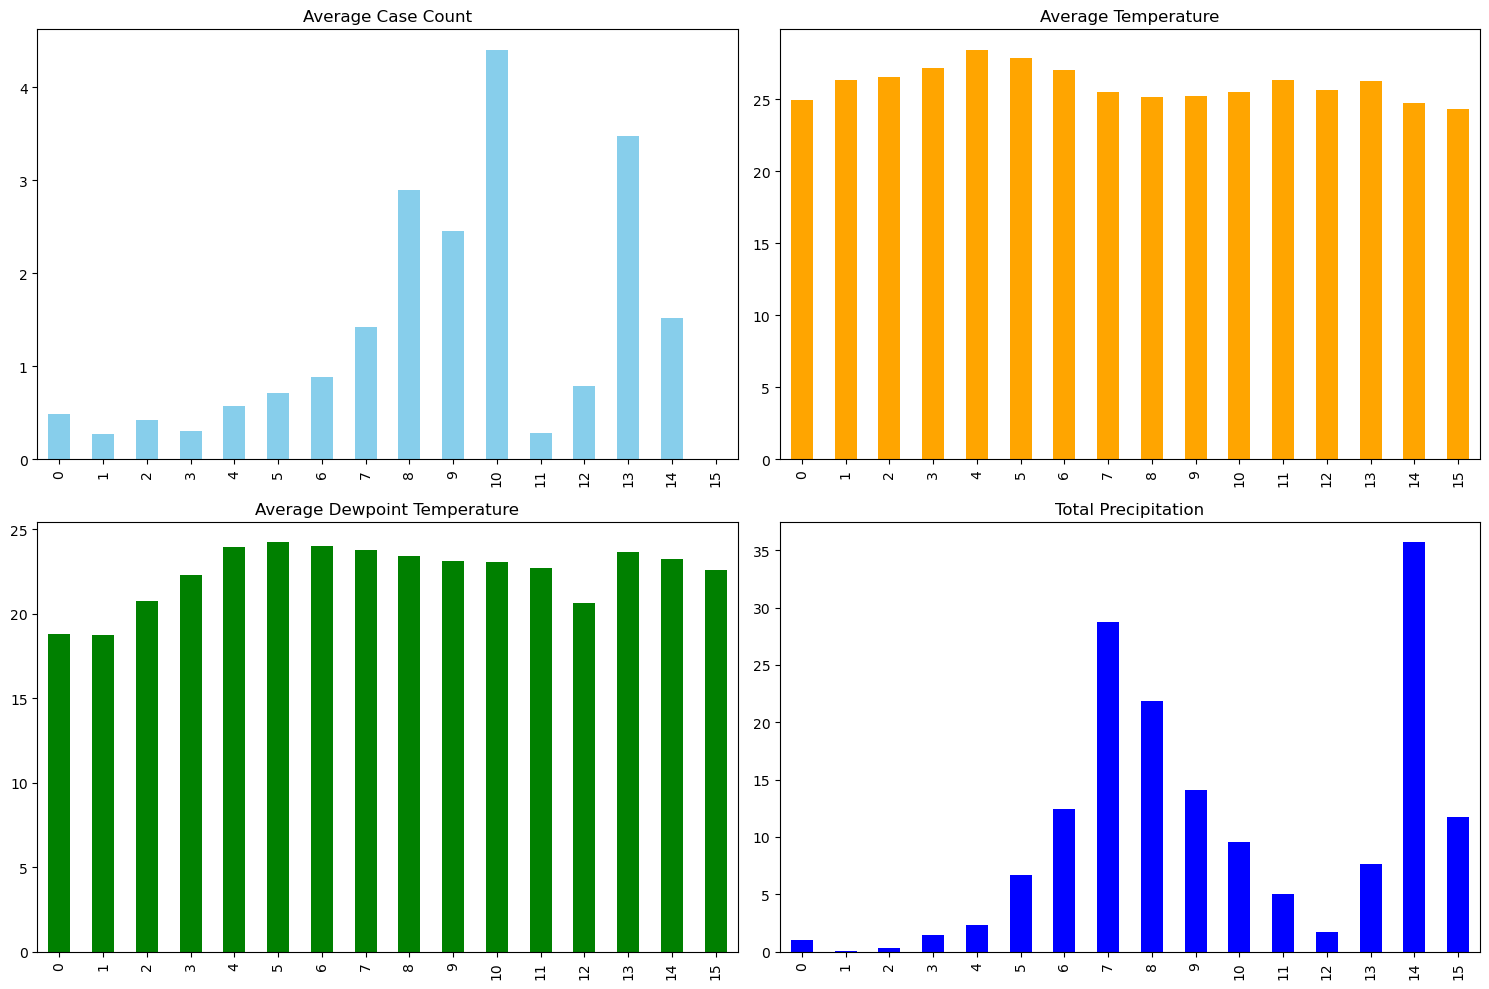

In [990]:
plot_statistics(cluster_values_df)

In [33]:
def analyze_clusters(trained_som, scaled_features): # Use the get_cluster_info function to get the cluster information cluster_info = get_cluster_info(trained_som, scaled_features)
    
    cluster_info = get_cluster_info(trained_som, scaled_features)
# Plot number of data points in each cluster
    plt.figure(figsize=(15, 5))
    cluster_labels = [f'Cluster {i+1}' for i in range(len(cluster_info))]
    plt.subplot(1, 2, 1)
    clusters = list(cluster_info.keys())
    counts = [len(info['indices']) for info in cluster_info.values()]
    bars = plt.bar(range(len(clusters)), counts, color='skyblue')
    plt.xticks(range(len(clusters)), cluster_labels, rotation='vertical')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Data Points')
    plt.title('Number of Data Points in Each Cluster')

    # Annotate each bar with its count
    for bar, count in zip(bars, counts):
        y_pos = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, y_pos, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

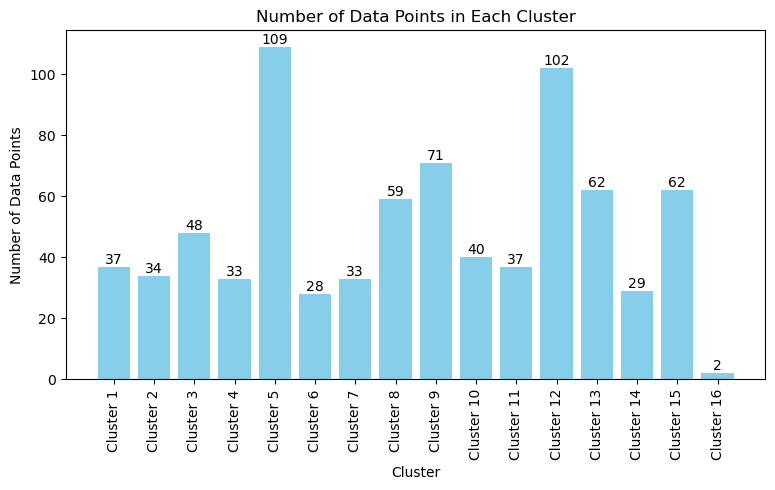

In [995]:
cluster_centers = analyze_clusters(trained_som, sf4)


In [30]:
def train_and_analyze_soms(noc,district_df,sf1, sf2, sf4,train_som, get_cluster_info, calculate_statistics):
    
    scaled_feature_sets = {
    'sf1': sf1,
    'sf2': sf2,
    'sf4': sf4
}
    # Dictionary to store the trained SOMs
    trained_soms = {}

    # Dictionary to store the cluster information
    cluster_infos = {}

    # Dictionary to store the cluster values dataframes
    cluster_values_dfs = {}

    # Loop over each scaled feature set
    for key, sf in scaled_feature_sets.items():
        # Train the SOM for the current scaled feature set
        stop_iteration, trained_som = train_som(sf, noc, .02, 15)
        trained_som.train_batch(sf, stop_iteration, verbose=True)
        
        # Store the trained SOM
        trained_soms[key] = trained_som
        
        # Get the cluster information for the current trained SOM
        cluster_info = get_cluster_info(trained_som, sf)
        
        analyze_clusters(trained_som, sf)
        # Store the cluster information
        cluster_infos[key] = cluster_info
        
        # Calculate statistics for the current cluster information
        cluster_values_df = calculate_statistics(cluster_info, district_df)
        
        # Store the cluster values dataframe
        cluster_values_dfs[key] = cluster_values_df
        
        
        plot_statistics(cluster_values_df)
    return cluster_values_dfs



Training stopped at iteration 54 as the change in error is below the threshold for 15 consecutive iterations.
 [ 54 / 54 ] 100% - 0:00:00 left 
 quantization error: 0.5097886049528182


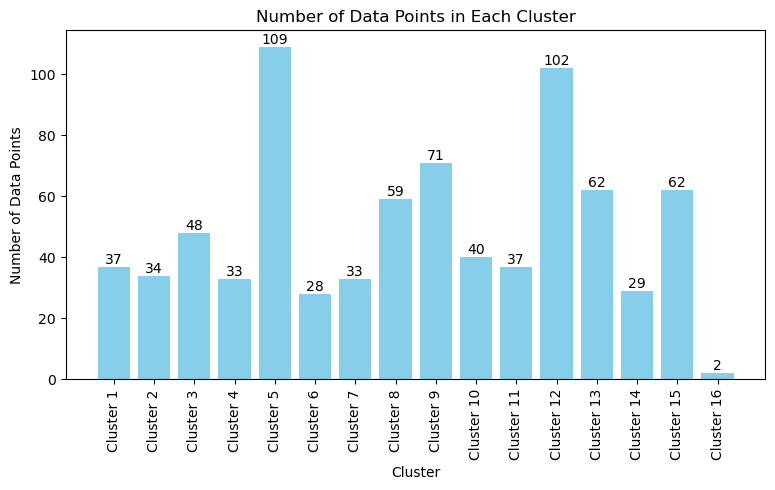

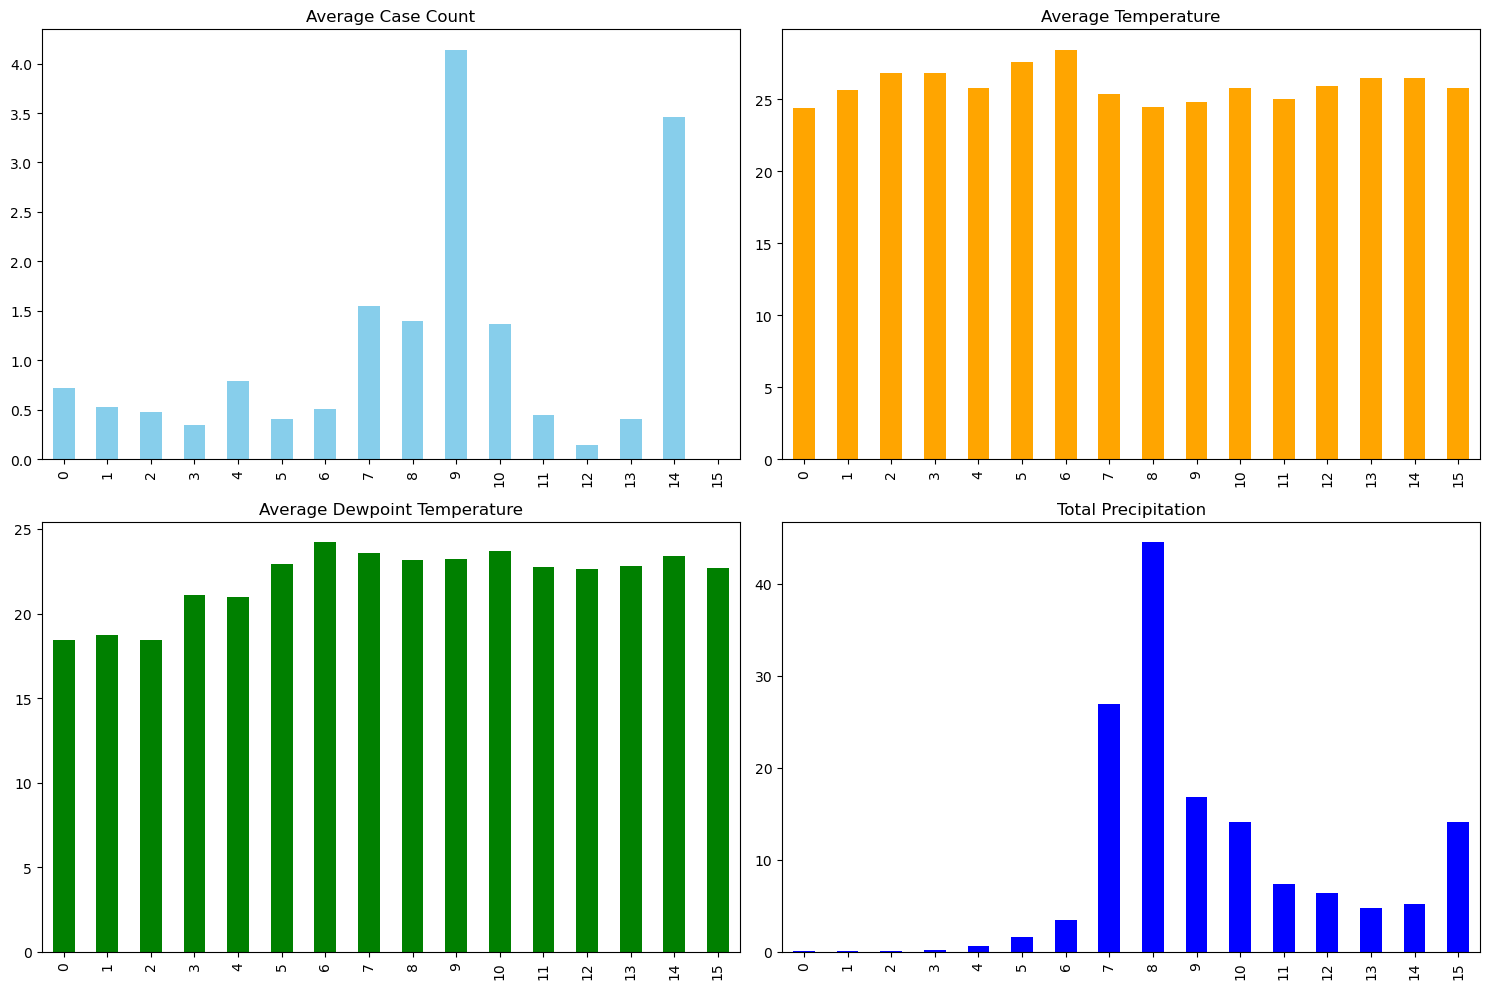

Training stopped at iteration 41 as the change in error is below the threshold for 15 consecutive iterations.
 [ 41 / 41 ] 100% - 0:00:00 left 
 quantization error: 0.46554804825043755


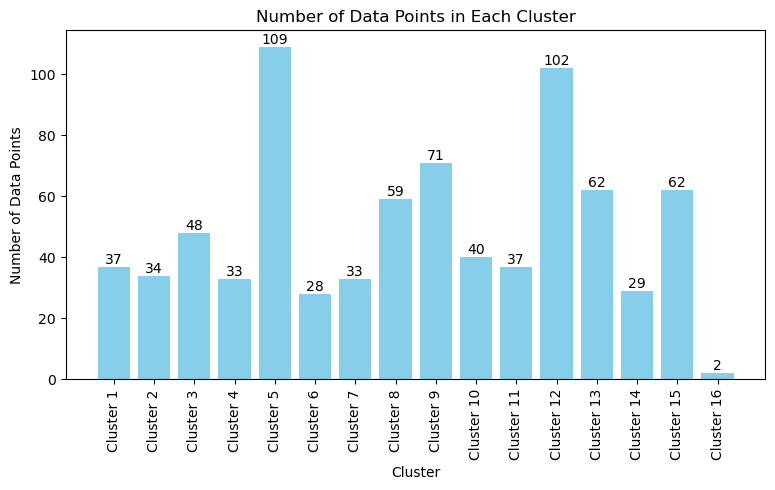

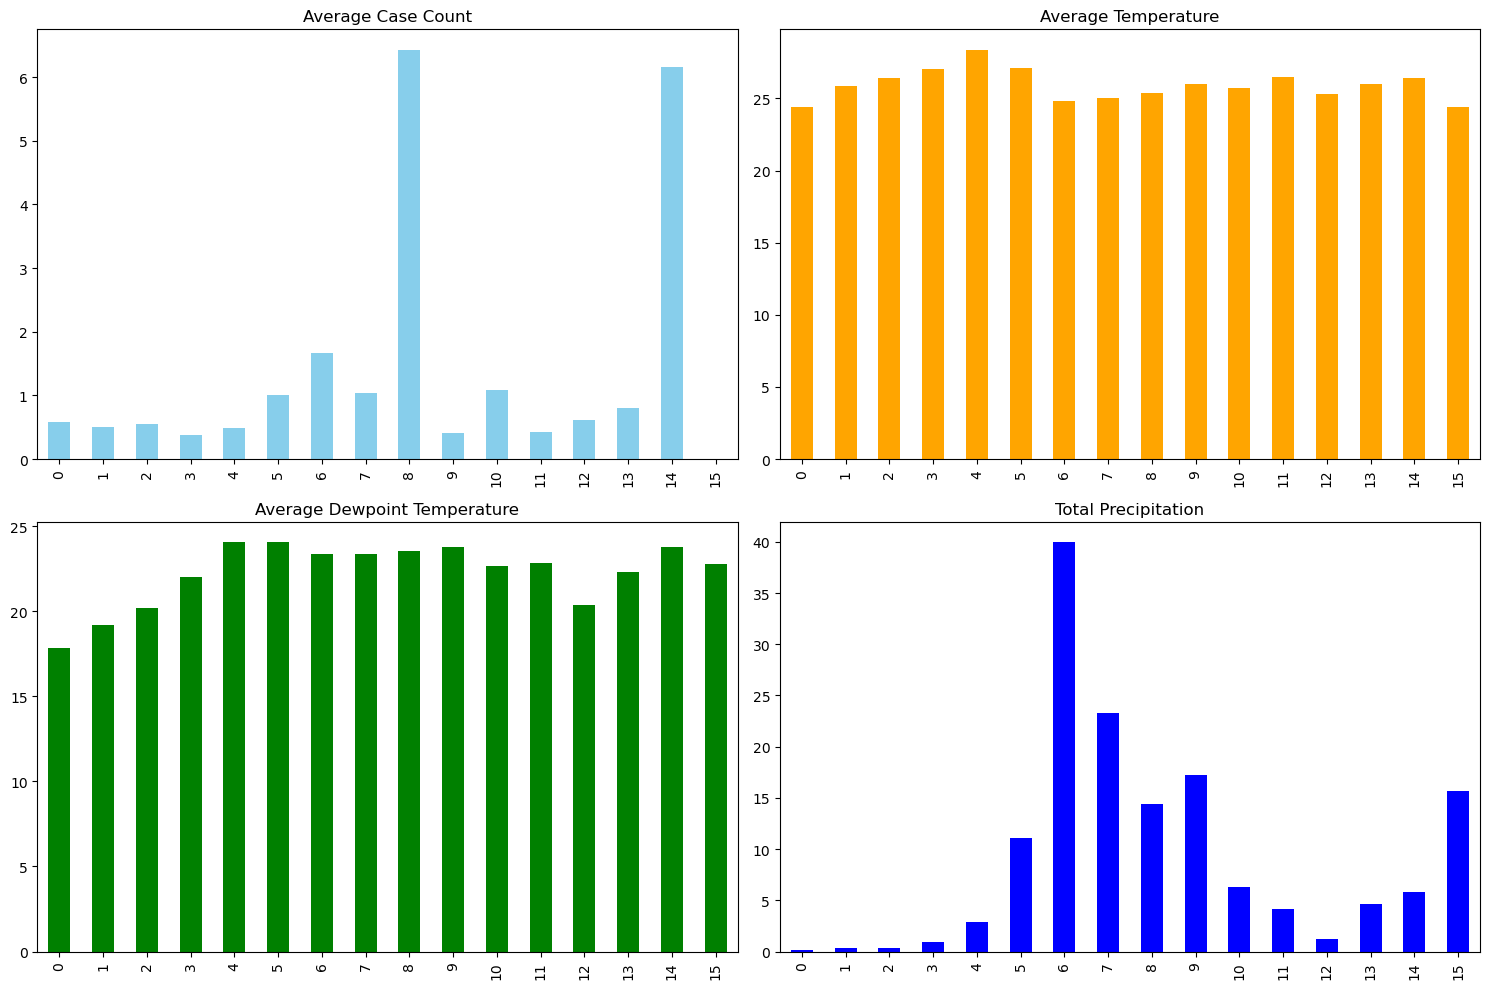

Training stopped at iteration 31 as the change in error is below the threshold for 15 consecutive iterations.
 [ 31 / 31 ] 100% - 0:00:00 left 
 quantization error: 0.4273546205014036


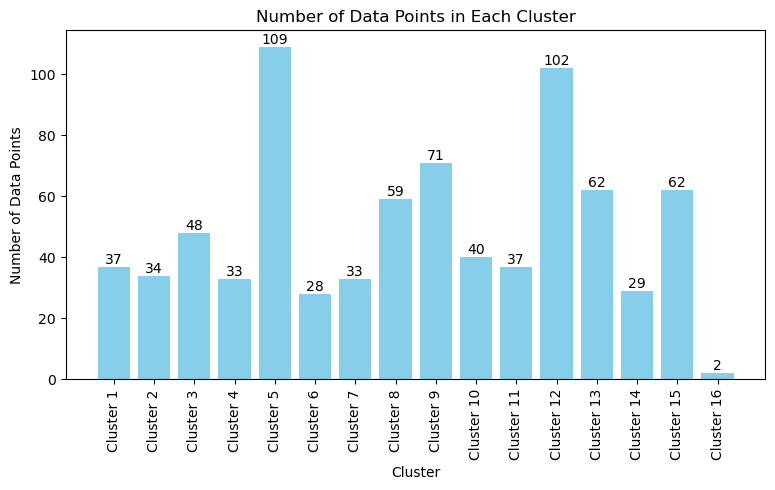

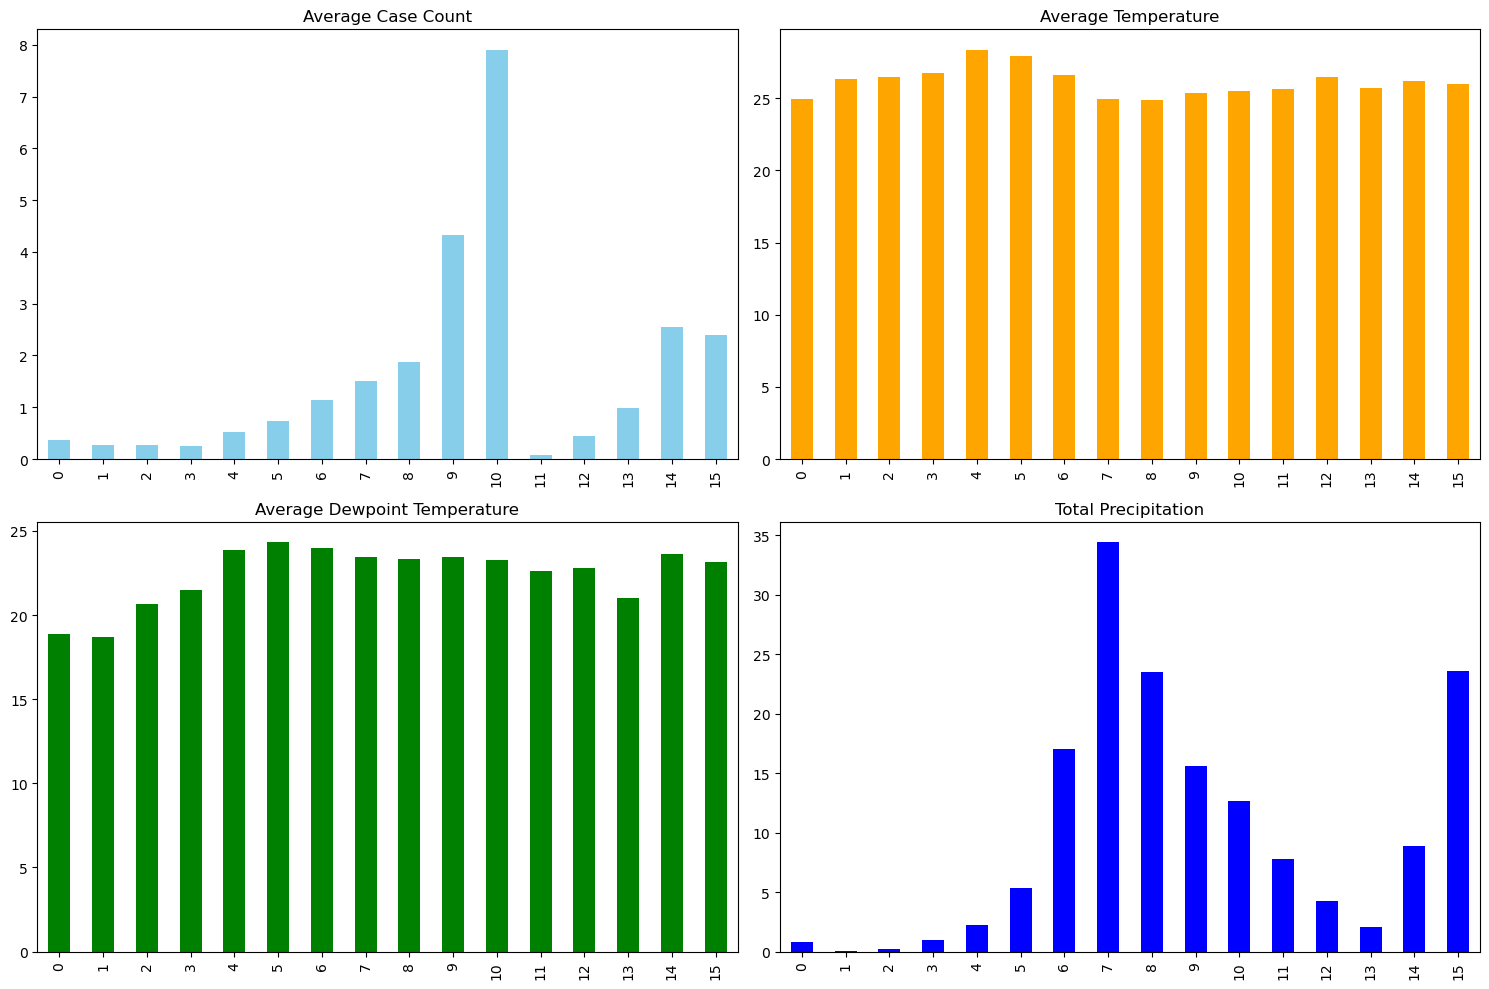

In [1005]:
cluster_values_dfs = train_and_analyze_soms(4,district,train_som, get_cluster_info, calculate_statistics)

In [949]:
df1 = cluster_values_dfs['sf1']
df2 = cluster_values_dfs['sf2']
df4 = cluster_values_dfs['sf4']

In [951]:
df2

,Case Count,Temperature,Dewpoint T,Precipitation
0,0.534884,24.547296,18.241662,0.198580
1,0.500000,25.950702,19.248906,0.302001
2,0.580645,26.454270,20.230346,0.311822
3,0.292683,27.126812,22.243312,1.343019
4,0.512000,28.452285,24.051592,2.337299
5,0.750000,27.445580,24.317667,8.522799
6,1.630952,24.938704,23.402653,39.117813
7,4.239130,24.882017,23.277286,16.607506
8,1.132353,25.031788,23.424403,24.961888
9,0.709677,25.748839,23.717012,17.813133


In [104]:
import matplotlib.pyplot as plt
def plot_variables(df1, df2, df4):
    
    grid_size = math.ceil(math.sqrt(len(df1)))
    
    variables = ['Case Count', 'Temperature', 'Dewpoint T', 'Precipitation']  # Replace with actual variable names

    # Define the labels for the bars
    labels = ['W1', 'W2', 'W4']

    # Define the bar width
    bar_width = 0.25

    color_map = {
        'Case Count': 'red',
        'Temperature': 'blue',
        'Dewpoint T': 'green',
        'Precipitation': 'black'
    }

    # Loop over each variable to create a separate 3x3 grid
    for variable in variables:
        # Find the global maximum value across all data points and dataframes for the current variable
        max_value = max(df1[variable].max(), df2[variable].max(), df4[variable].max())

        # Create a figure with a 3x3 grid of subplots for the current variable
        fig, axs = plt.subplots(grid_size, grid_size, figsize=(5, 5), constrained_layout=True)

        # Flatten the array of axes for easy iteration
        axs = axs.flatten()

        # Loop over each of the 9 data points
        for i in range(len(df1)):
            # Extract the i-th value of the variable from each dataframe
            values = [
                df1[variable].iloc[i],
                df2[variable].iloc[i],
                df4[variable].iloc[i]
            ]

            # Plot the bars in the i-th subplot with reduced width
            axs[i].bar(labels, values, width=bar_width, color=color_map[variable])

            # Set the title and labels for the subplot
            #axs[i].set_title(f'{variable} - Data Point {i+1}')
            #axs[i].set_xlabel('Week')
            axs[i].set_ylabel(variable)

            # Set the same y-axis limit for all subplots
            axs[i].set_ylim(0, max_value + (max_value * 0.1))  # Add 10% headroom for better visualization

        # Adjust the layout and show the plot for the current variable
        plt.suptitle(f'4x4 Grid of Subplots for {variable}')
        plt.show()
# List all the variables you want to plot


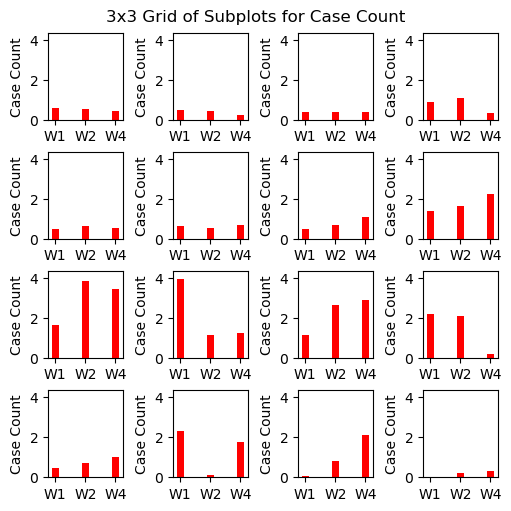

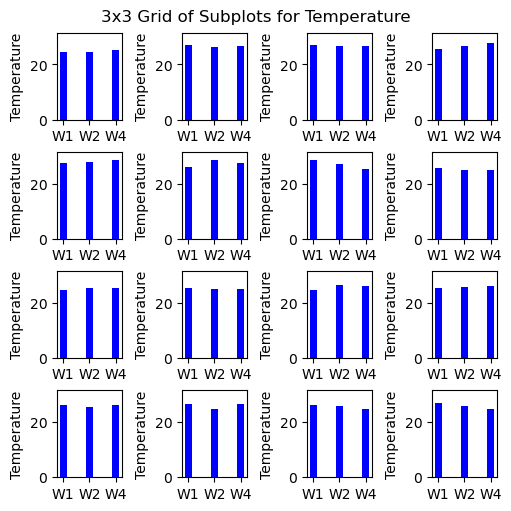

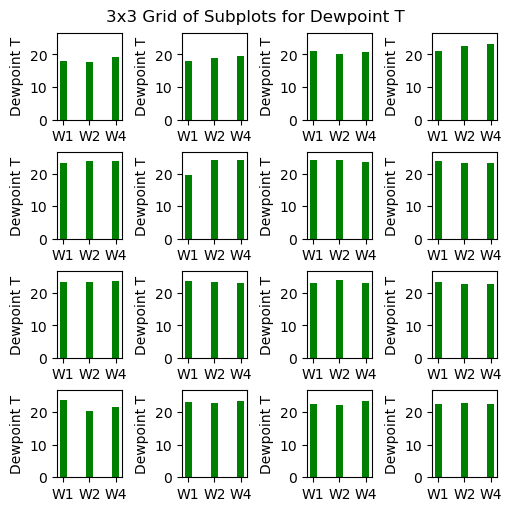

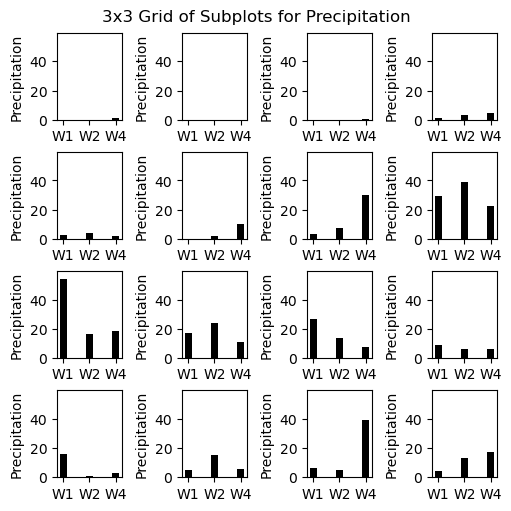

In [928]:
plot_variables(df1, df2, df4)

In [87]:
def plots(district_data, noc):
      # Renamed variable to avoid conflict
    w1, sf1 = weekly_avg(district_data, 1)
    w2, sf2 = weekly_avg(district_data, 2)
    w4, sf4 = weekly_avg(district_data, 4)
    
    # Assuming train_and_analyze_soms and plot_variables are defined elsewhere
    cluster_values_dfs = train_and_analyze_soms(noc,district_data,sf1, sf2, sf4,train_som, get_cluster_info, calculate_statistics)
    df1 = cluster_values_dfs['sf1']
    df2 = cluster_values_dfs['sf2']
    df4 = cluster_values_dfs['sf4']
    plot_variables(df1, df2, df4)

# Call the function with the corrected name


Training stopped at iteration 50 as the change in error is below the threshold for 15 consecutive iterations.
 [ 50 / 50 ] 100% - 0:00:00 left 
 quantization error: 0.4952517801981826


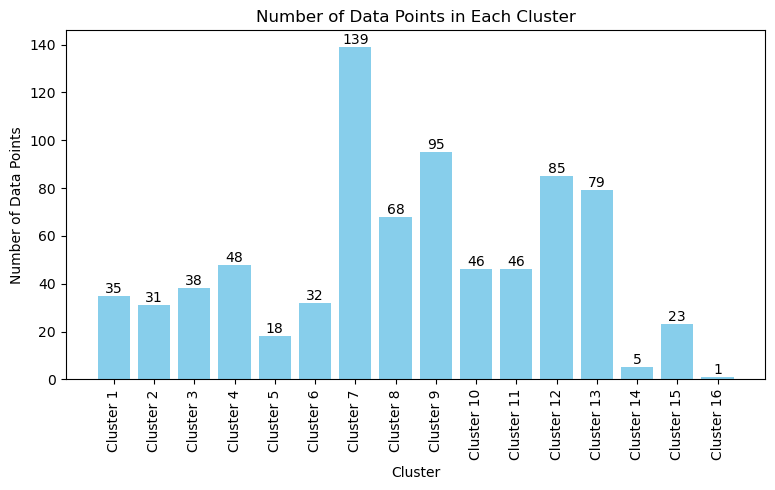

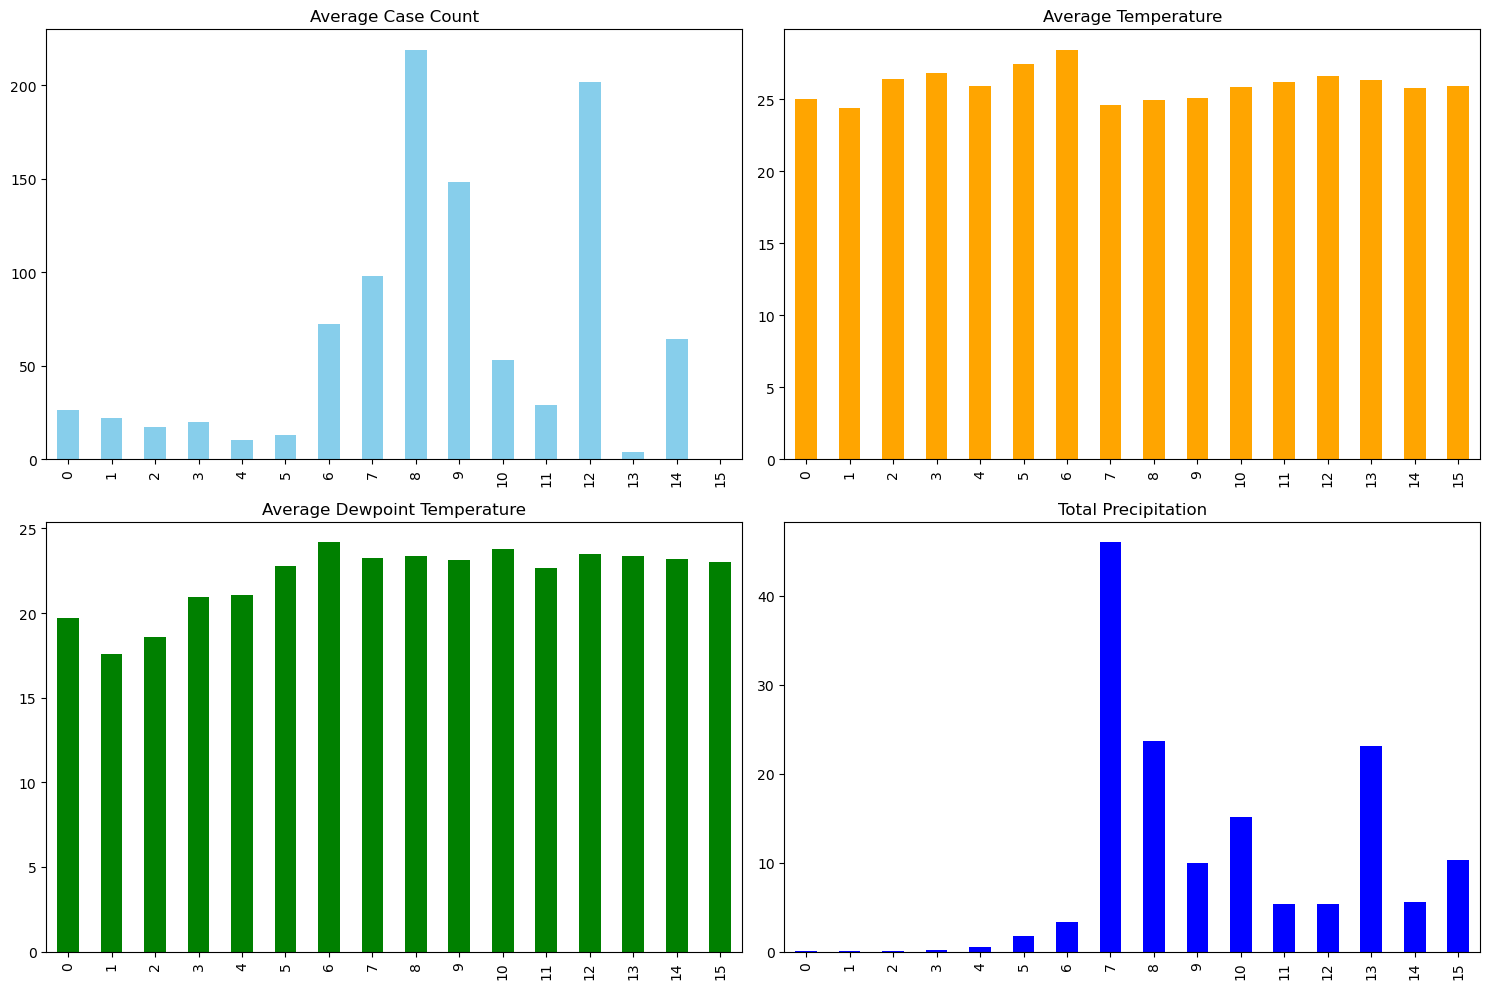

Training stopped at iteration 83 as the change in error is below the threshold for 15 consecutive iterations.
 [ 83 / 83 ] 100% - 0:00:00 left 
 quantization error: 0.4619117283694645


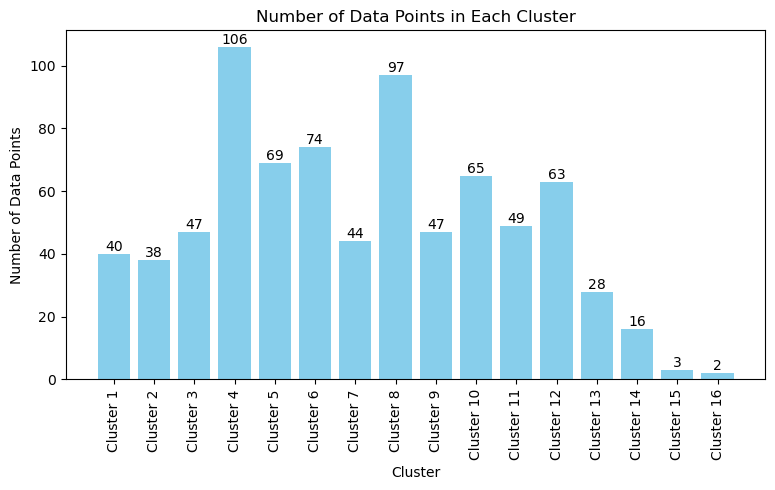

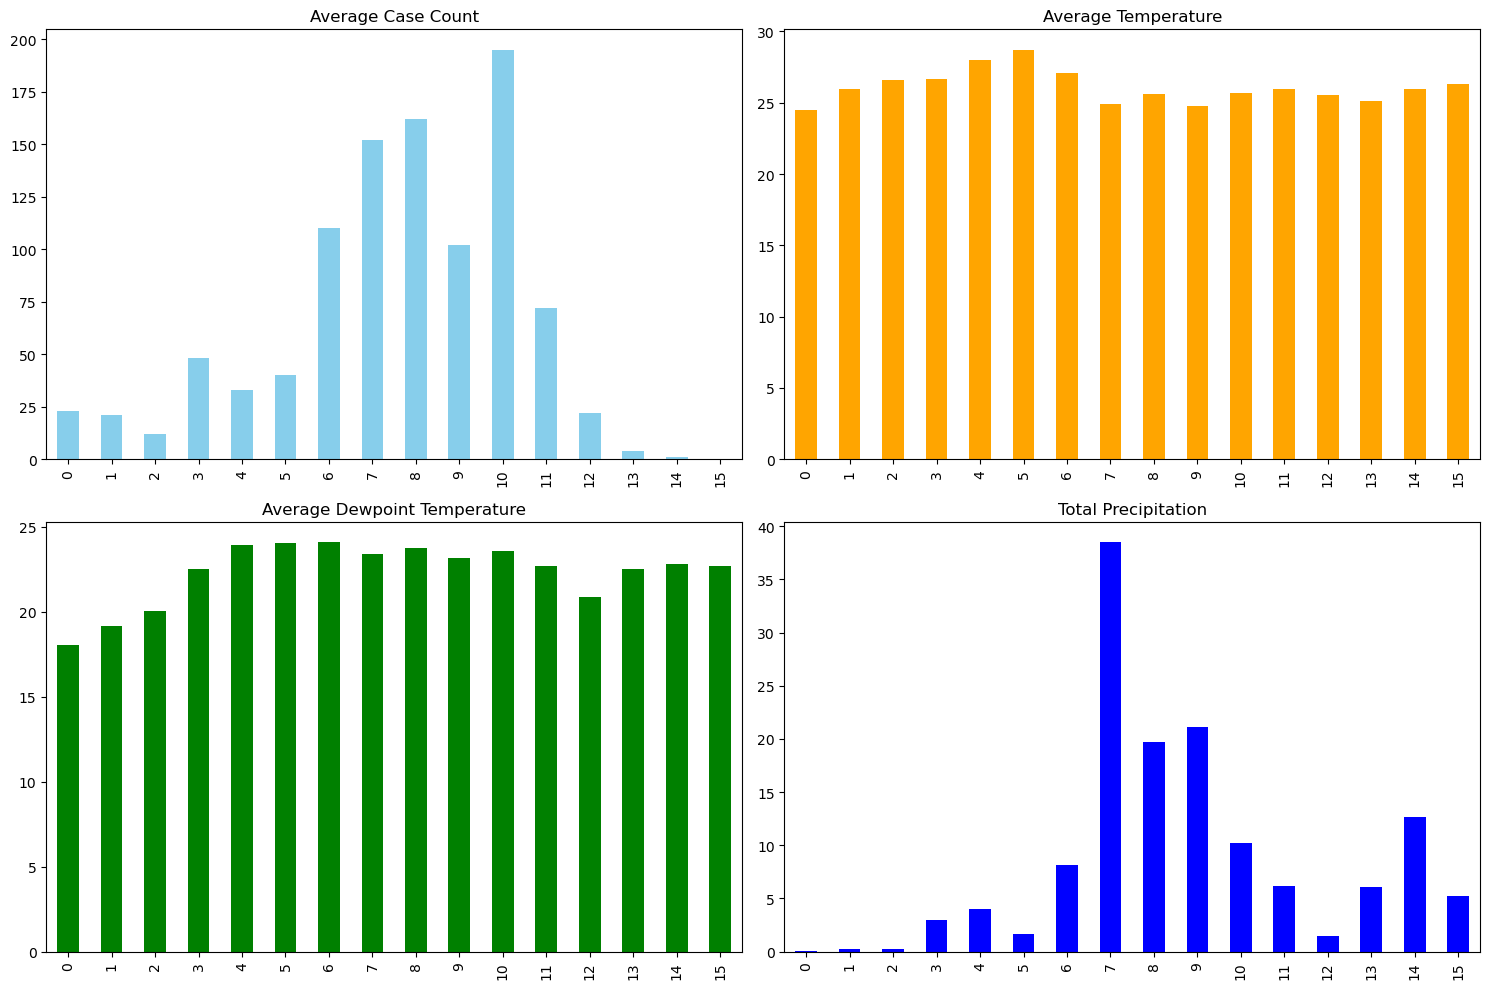

Training stopped at iteration 56 as the change in error is below the threshold for 15 consecutive iterations.
 [ 56 / 56 ] 100% - 0:00:00 left 
 quantization error: 0.45506621673870595


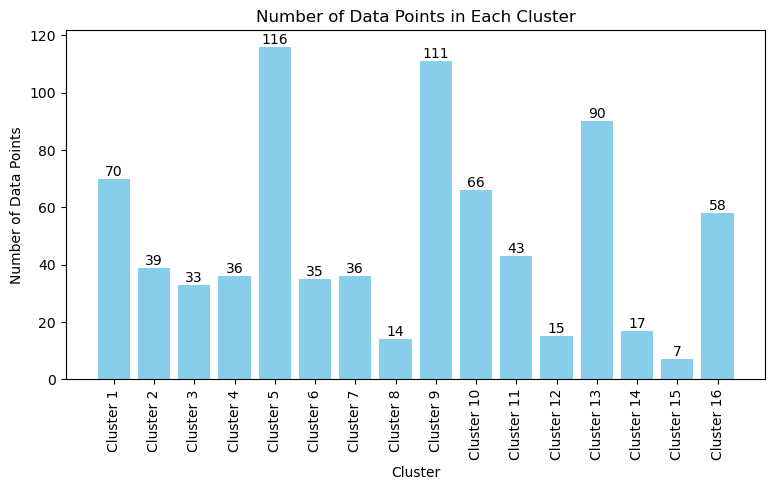

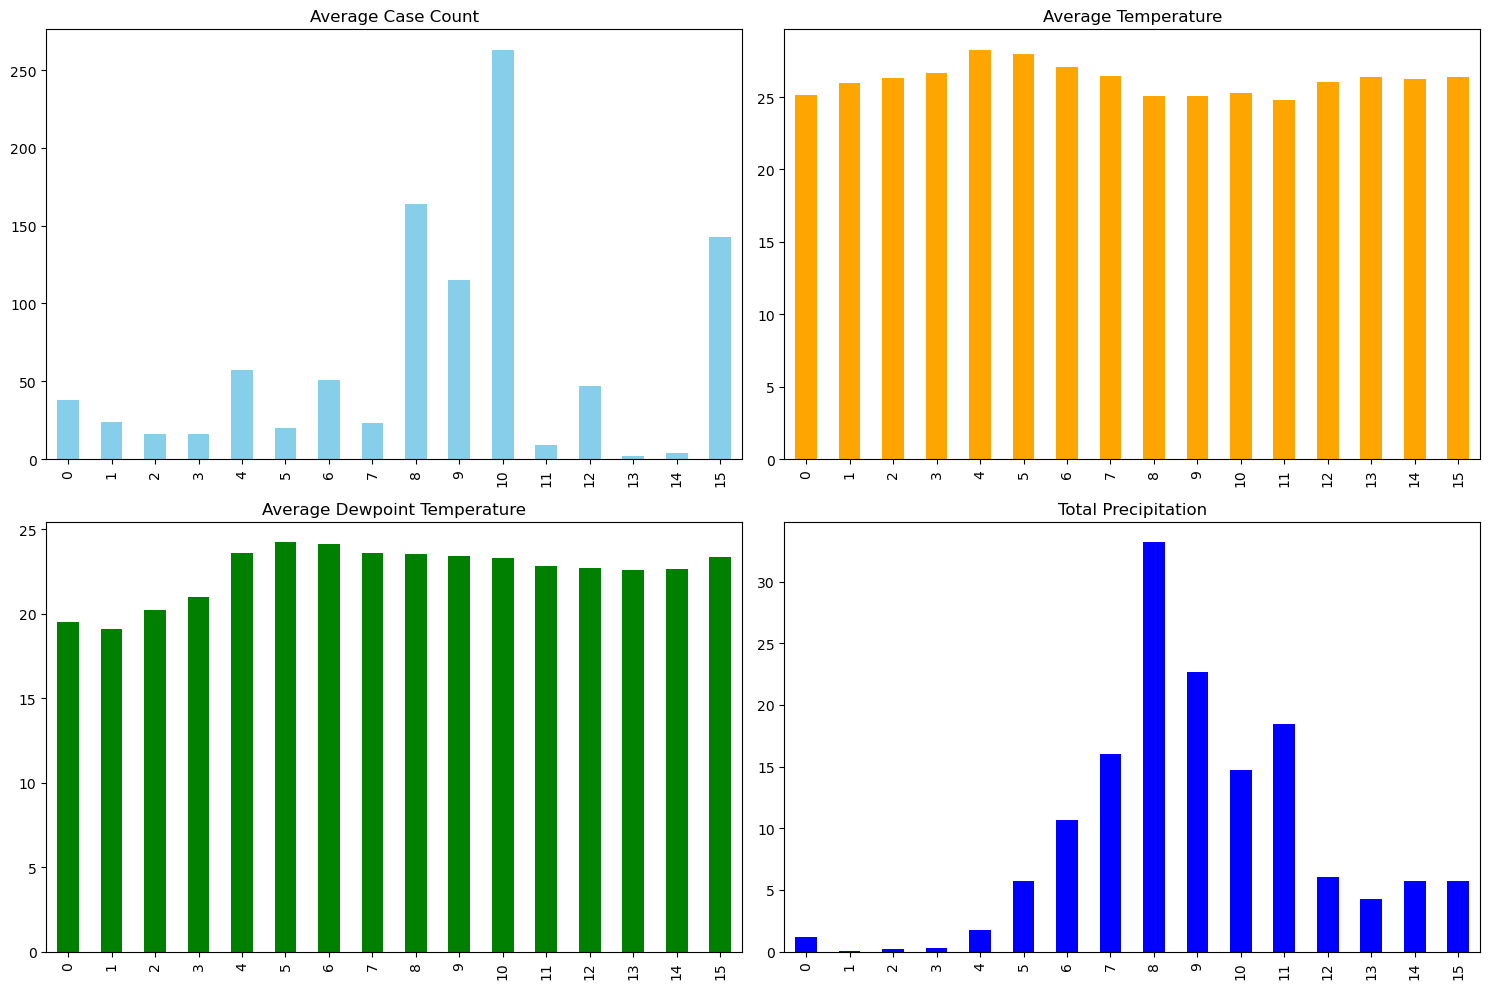

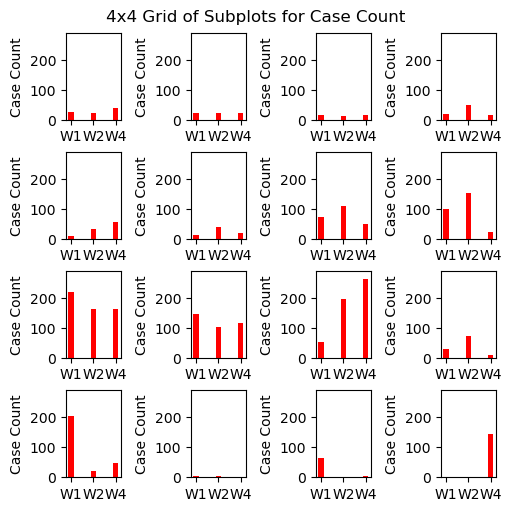

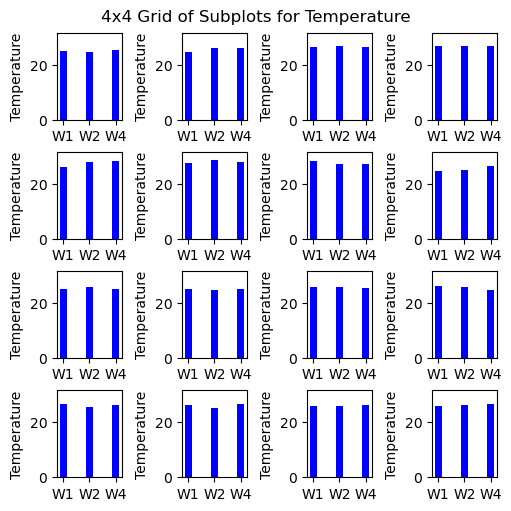

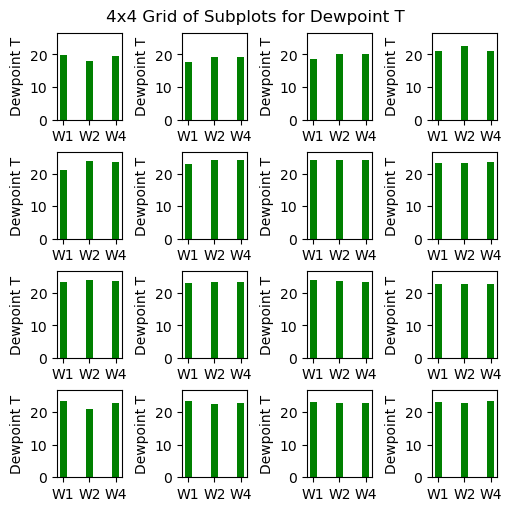

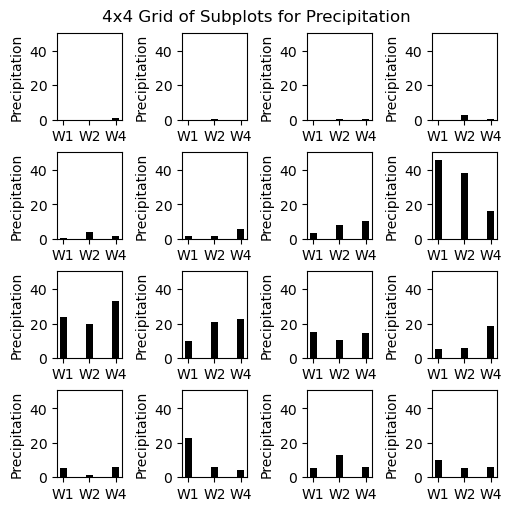

In [118]:
plots(district_data, 4)